# TIL6022 Project Report Group 14

Evert Ingwersen - 5096374

Anniek Hellemans - 5119103

Aurora Nieuwenhuis - 5273552

Julia Lakeman - 5171156

Felix Scheepens - 6279031

## Objective
The objective of this research is to investigate how the growing share of zero-emission passenger vehicles (ZEV) has influenced the net CO2 footprint of EU member states over the past decade. As the climate crisis continues to worsen, understanding the role that zero-emission vehicles play in reducing CO2 emissions is more important than ever. This research project aims to explore the connection between the increasing adoption of these vehicles and changes in CO2 emissions across different countries in the EU. This way, we intend to provide valuable insights to those who are working to create cleaner and more sustainable transportation solutions in the European Union.

For this research, the main focus will be on passenger vehicles. Since the entire transport sector accounts for 21% of total emissions, and passenger car  transport accounts for 45% of transport emissions, it follows that passenger car transport accounts for 10% of total CO2 emissions. This leads to the conclusion that passenger vehicles can have an impact on the overall CO2 emissions and the focus of research (1).

Another reason to look at passenger vehicles, is that the growth of zero emission vehicles mainly have been in the passenger vehicle sector. Despite being very developed in electric trucks, they are not yet in widespread use. The trucks are too heavy and the bateries too small, so they have no additional value yet in the research being done here. 

In the past years, the transport sector has been the only sector in which greenhouse gas emissions have increased. However, reducing CO2 emissions from transport will not be easy, as the CO2 emissions rate is only decreasing slowly. By anwsering the main and sub objectives it will be looked at whether there is a correlation between the zero-emission passenger vehicles and the net CO2 footprint in EU countries over the past decade, in order to investigate whether this vehicle type is the way forward for a net zero Europe.


### Research Questions: 

Main question: To what extent does the share of non-emission passenger vehicles affect the net CO2 footprint per EU country over the past decade?

Subquestion 1: Is there a relation between the relative change in emissions and the change in the share of emission vehicles (EV) in each EU country over the past decade?

Subquestion 2: Does an increase in zero emission vehicles (ZEV) lead to a decrease in emission vehicles (EV) in each EU country over the past decade?

Subquestion 3: Is there any notable regional trends within specific EU countries over the past decade?

# Data Used

### Databases (eurostat):
1. Passenger cars, by type of motor energy (https://ec.europa.eu/eurostat/databrowser/view/road_eqs_carpda__custom_13067669/default/table?lang=en)
2. Stock of zero-emission vehicles at 31st December by type of vehicle and type of motor energy (https://ec.europa.eu/eurostat/databrowser/view/road_eqs_zev/default/table?lang=en&category=road.road_eqs
3. Net greenhouse gas emissions (https://ec.europa.eu/eurostat/databrowser/view/sdg_13_10/default/table?lang=en&category=t_env.t_env_air)
4. Population of each EU country on the 1st of January over the past decade https://ec.europa.eu/eurostat/databrowser/view/tgs00027/default/table?lang=en


# Data Pipeline 
This project’s data pipeline consists of a series of steps designed to integrate, clean, and transform the data found from multiple sources into one cohesive dataset. The final output can then be used for the analysis of the ZEV vs emissions trends for the EU countries over the past decade. Below is an overview of the key parts in this pipeline:

### 1. Data Collection
The process begins by finding the data. The data was found on Eurostat and consists of the sources explained in the introduction. Next, the datasets are imported using pandas. Four different CSV files are loaded, each containing its own dataset:

CSV1: Contains the number of passenger vehicles per country per year.\
CSV2: Records the number of zero-emission vehicles (ZEVs) per country per year.\
CSV3: Tracks emissions per capita by country per year.\
CSV4: Lists populations of countries per year.

### 2. Initial Data Preparation
After loading the data, CSV4 is modified to include only essential columns (geo, TIME_PERIOD, OBS_VALUE), with the OBS_VALUE column renamed to population. Sets of unique country codes from each dataset are then created and compared to ensure consistency. The shared set of countries across all datasets forms the base for subsequent data merging.

### 3. Data Integration
The merging of datasets follows a stepwise approach:

Merging Datasets: CSV1 and CSV2 are merged using a right join on the geo and TIME_PERIOD columns to combine passenger vehicle data with zero-emission data.\
Adding Emissions and Population Data: The result is then merged with CSV3 (emissions data) and CSV4 (population data) using left joins. This ensures the data being aligned for each country-year combination.

### 4. Data Transformation into Useful Metrics
In the combined dataset, the columns are then renamed for clarity, e.g., OBS_VALUE_y to amount_zev, and TIME_PERIOD to time_period. Country codes (geo) are transformed to full country names using a predefined mapping dictionary to enhance readability.

Afterwards, new metrics are calculated that for later use:

share_zev: Proportion of ZEVs among total passenger vehicles.\
amount_ev: Number of non-zero-emission vehicles.\
zev_per_capita and ev_per_capita: Ratios of ZEVs and non-zero-emission vehicles to population size.\
total_emissions: Estimated total emissions by multiplying emissions per capita by population.


### 5. Data Transformation for Yearly Differences
The dataset is then used to calculate year-over-year differences: zev_diff, ev_diff, emmission_diff, and all_cars_diff show absolute changes in relevant variables compared to the previous year.

These metrics from step are subsequently normalised by converting them into a percentage increase in order to use them as growth factors in the scatterplot and time plot. These new metrics have the underscore "norm" (e.g., zev_norm, ev_norm) to represent percentage change relative to the previous year.

### 6. Data Cleaning and Validation
Rows with missing values are identified and removed, ensuring data quality. Any non-numeric values in key columns are converted to numeric types to handle format inconsistencies. A final cleanup step drops remaining rows with NaN values to produce a robust dataset.

### 7. Final Dataset and Grouping
The processed dataset, df_cleaned, includes columns for yearly differences and normalized changes and is grouped by country (geo) to enable country-specific analysis.

## 1. Is there a relation between CO2 and change in share of the emission vehicles in each EU country?

In this question there will be looked at the relation between the emission vehicles and emissions in Europe. To see whether there is a correlation between them. Hypothetically a decrease in emission vehicles leads to a decrease in the total emissions, based on that 10% of the total emissions is caused by passenger cars. 

### Scatterplot Analysis

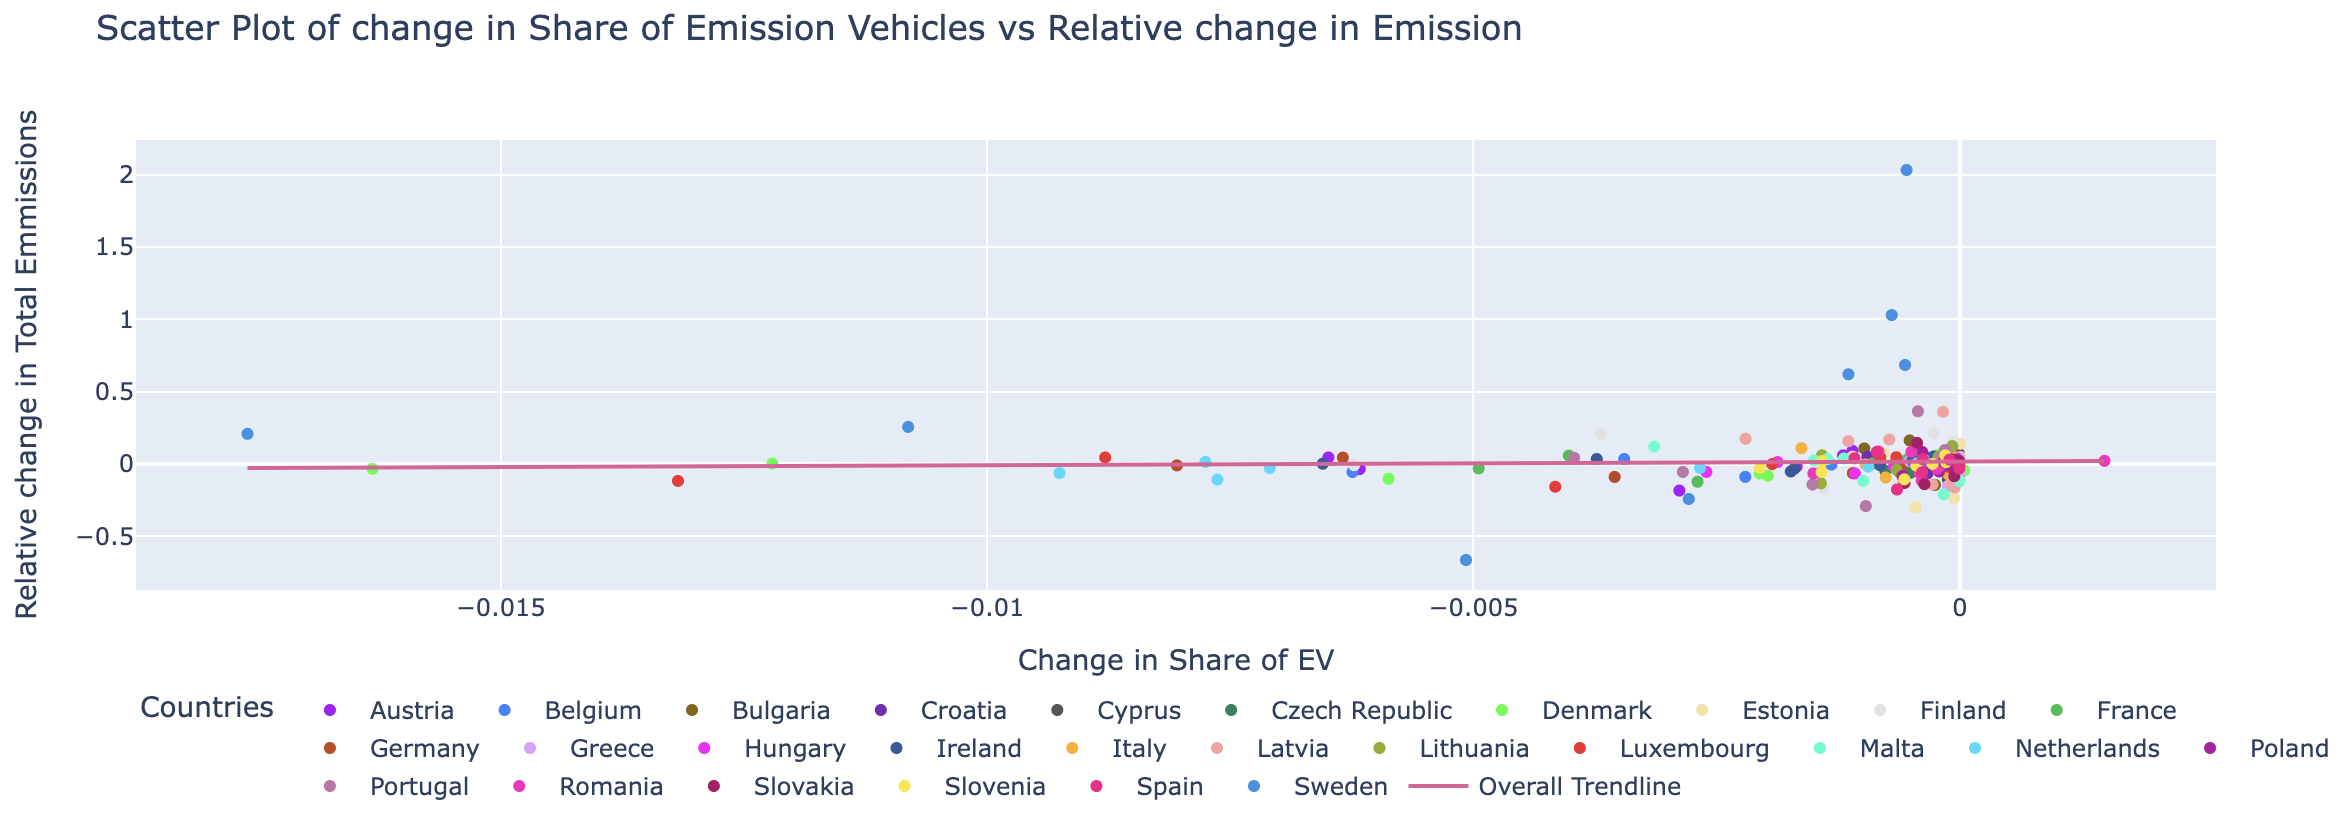

In the data it is noticed that in most countries, the amount of emission vehicles grows over the years, however the amount of zero emission vehicles does as well. Also, amount can vary a lot between countries, leading to plots being unclear. Therefore, it is decided to look at the change in share of emission vehicles, instead of the change in amount of emission vehicles. In addition, to get rid of the ‘time’ dimension, it is decided to look at differences compared to the year before.

All in all, the change in share of emission vehicles is plotted against the change in total emissions for each country in a scatter plot. The change in emissions is the total emissions of the current year minus the total emissions of the previous year in a country. The share of the zero emissions vehicles is the number of zero emissions vehicles divided by the total number of vehicles in a country. The change in share of zero emission vehicles is thus the share of zero emissions vehicles in a year minus the share of zero emissions vehicles in the year before, for each country.

### Conclusion 

Looking at the scatter plot, it shows that there is a positive trendline, however, points are not showing a clear pattern. In addition, the R^2 of the trendline is only 0.003, and thus, there cannot be draw a certain conclusions from this plot. On the other hand,there is also no clear reason to reject the hypothesis.

## 2. Does an increase in  zero emission vehicles lead to a decrease in emission vehicles?
In this question it will be looked at whether a decrease in emission vehicles actually causes an increase in
zero emission vehicles. 

If this is indeed the case, then the main research question is one step closer to being answered as a decrease in EVs due to an increase in ZEVs would imply an emission reduction that can be traced back to the rise in ZEVS.

### Scatterplot Analysis

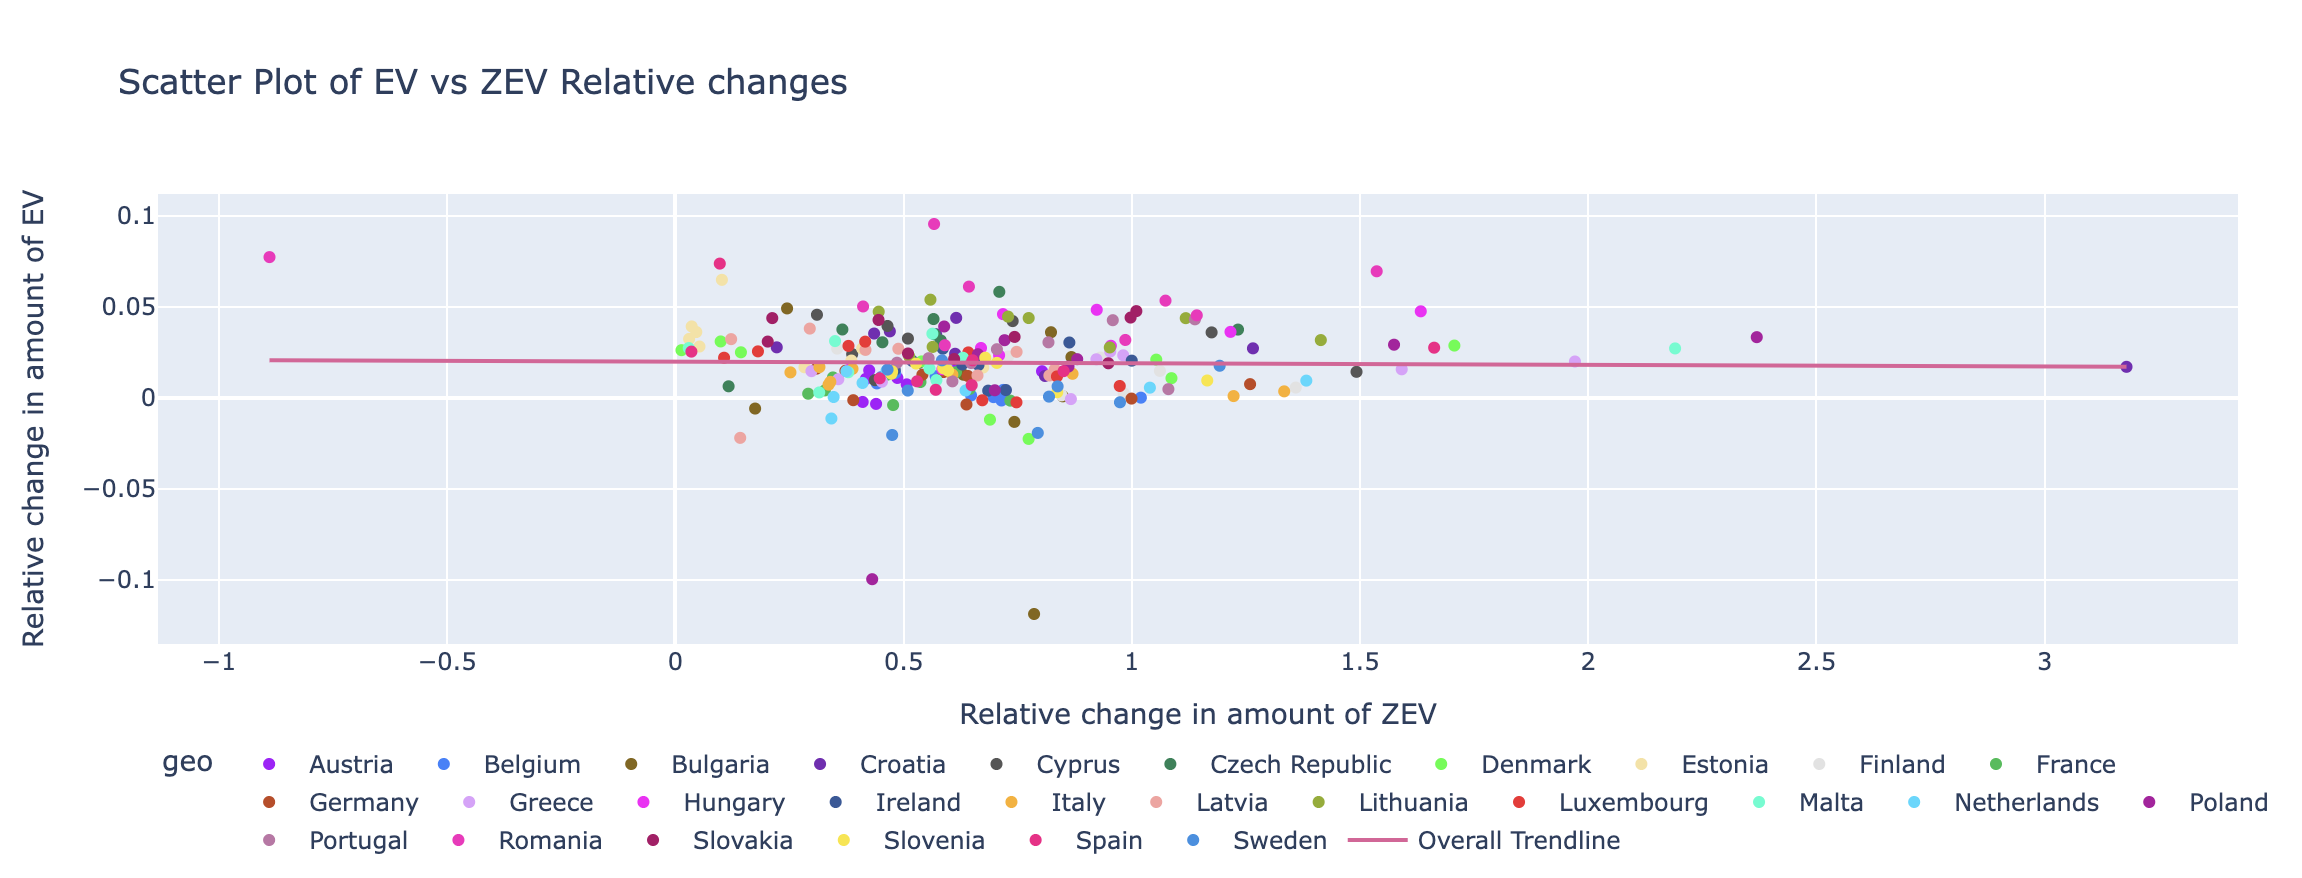

In the scatter plot the relative change in amount of emission-vehicles versus non-emission vehicles in different EU countries over the years is shown. This can be seen a a percentage by multiplying it with 100. This percentage difference is a relative number, characterised by the percentage increase in the respective type of vehicle expressed as a growth factor. 

As can be seen from this scatterplot, a negative trend line can be found, implying that the fraction of emission vehicles over the non emission vehicles is decreasing. Thus, there are more non-emission vehicles per emission vehicle.

### Notable Outliers
However, there are a few notable outliers. Some of these inlcude Romania, Poland and Croatia. Zooming in on one of these outliers, the Romania 2018 data point in the top left of the scatterplot, it can be seen that in that year the ZEV percentage difference was - 0.9, thus implying a 90% decrease in amount of ZEV compared to the year before (2017). This seems to be quite high, as it would imply Romania got rid of 90% of its ZEVs in that year. On the other hand, Croatia seems to have experienced a dramatic increase in ZEVs, namely an increase of around 300% in 2015.

Thus these outliers need to be further explored, and this is done in subquestion 3, where a timeplot is made in order to investigate the behaviour of the outliers Romania, Poland and Croatia.

It is also worth to notice that Bulgaria seems to have had a 10% decrease in amount of EVs in 2017, while simultaneously having an increase of 80% in ZEVs. However, in the other years it seems to have experienced increases more similar to the typical countries, thus in the timeplot, this peak will be harder to perceive than for the other three outliers.

### Conclusion
Thus it can be concluded that there is a slight negative trend to be seen between EVs and ZEVs, thus implying that a decrease in EVs is connected to an increase in ZEVs.

# 3. Is there any notable regional trends within specific EU countries?

### Scatterplot Analysis

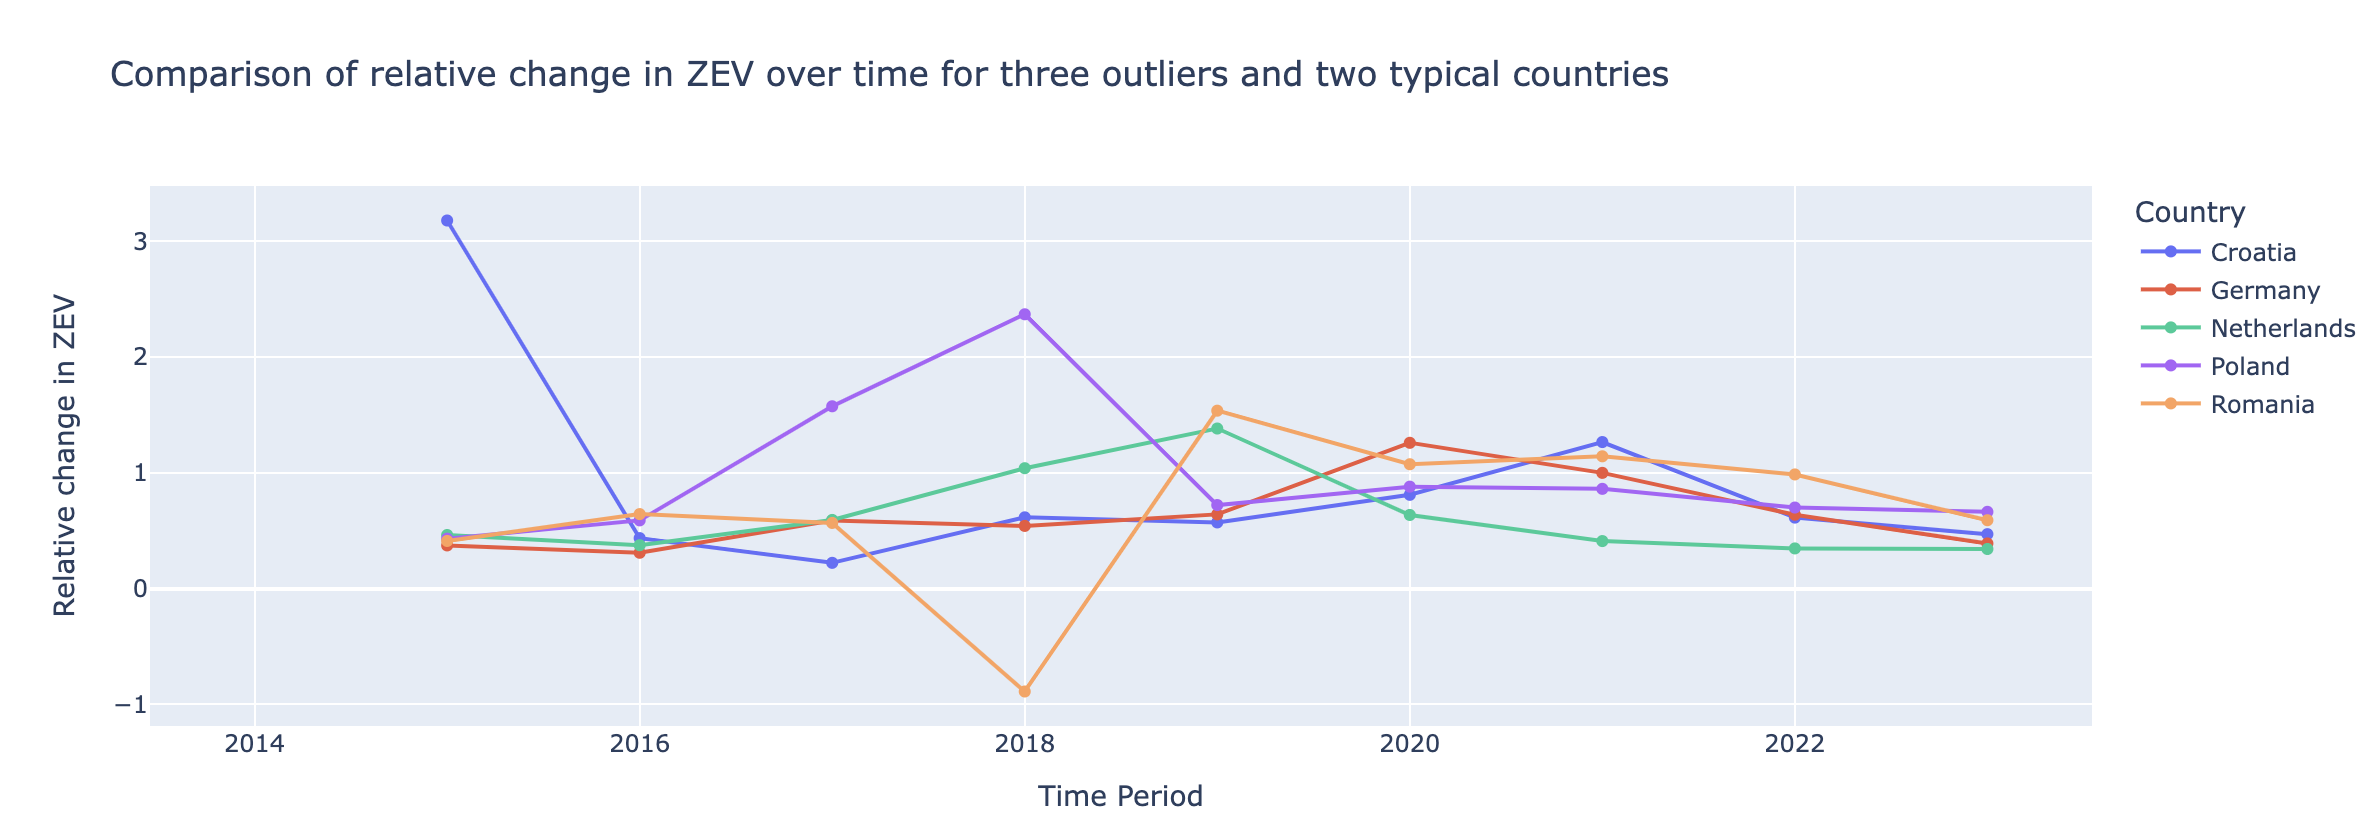

In this time plot, the relative change in ZEVs for each of the EU countries over the past decade is shown, given as a growth ratio. The three outliers considered in this plot are Croatia, Poland, and Romania. Furthermore, two typical countries identified in subquestion 2 are also shown, namely the Netherlands and Germany.

### Notable Outliers

As seen from this time plot, Croatia's ZEV growth experienced a relative decrease after its initial peak in 2015, similar to Poland, which experienced a decrease in 2018. Romania, in contrast to Poland, saw a sharp increase in 2018 that later leveled out.

### Conclusion 

In answer to subquestion 3, there were regional differences in the increases and decreases for different countries. The Eastern European countries—Croatia, Romania, and Poland—show far more variation in the percentage increase and decrease of ZEVs compared to more developed countries like the Netherlands and Germany. However, it can be seen that, over the years, the differences in percentage increases in ZEVs between countries have become smaller.

And it can be concluded that there is a slight negative trend to be seen between growth of EVs and ZEVs, thus implying that a decrease in growths of EVs is connected to an increase growth in ZEVs.


# Conclusion

This research shows relationship between the rise of non-emission passenger vehicles and the impact on CO2 emissions across EU country’s over the past decade. As the climate crisis intensifies, it's essential to understand how zero-emission vehicles (ZEVs) can contribute to reducing greenhouse gas emissions

The first analysis of subquestion one reveals the difficulty in establishing a clear link between CO2 emissions and the increase in non-emission vehicles in different countries. The low R² value from our analysis indicates that while there may be some relationship, it is not strong enough to draw firm conclusions. This complexity suggests that many factors are influencing emissions beyond just the number of ZEVs on the road.

Interestingly, the second analysis of  subquestion two indicates a slight negative trend, suggesting that an increase in ZEVs might be associated with a decrease in the growth of conventional electric vehicles (EVs). This transition might reflect a broader shift in consumer preferences and policies that prioritize fully zero-emission options as we move towards cleaner transportation solutions.

Thirdly, the regional differences show that adoption rates of ZEVs vary widely across the EU. Eastern European countries like Croatia, Romania, and Poland exhibit more fluctuations in their ZEV growth compared to more established markets like the Netherlands and Germany. However, it is encouraging to see that over the years, the gaps in ZEV adoption between different countries are starting to close. This convergence may signal a collective effort to standardize and enhance the transition to cleaner vehicles across the EU.

Overall, while the various plots provide some insights into the relationship between zero-emission vehicles and CO2 emissions, the analysis presented is only slightly indicative and not robust enough to draw a firm conclusions. The trends observed in the analyses suggest potential connections, but they lack the strength required to support firm conclusions about the influence of ZEVs on CO2 emissions across EU countries. 

Despite the fact that passeger cars account for about 10% for the total CO2 emission, it may limit the ability to observe a clear trend for the research question. Further research is needed to explore the dynamics that influence emissions reduction and fully understand the potential contributions of zero-emission.

# References

[1] Ritchie, H., & Roser, M. (2024, 18 maart). Cars, planes, trains: where do CO₂ emissions from transport come from? Our World in Data. https://ourworldindata.org/co2-emissions-from-transport


# Contribution Statement

### Evert Ingwersen 
-	Background Research
-	Introduction & research objective  
-	Uploading all data sets 
-	Data processing, analysis and vizualisation subquestion 2, 3
-   ⁠Report layout
-   GitHub managment 
### Anniek Hellemans 
-	Background Research
-	Introduction & research objective 
-	Data processing, analysis and vizualisation subquestion 1, 3
### Aurora Nieuwenhuis 
-	Background Research
-	Introduction & research objective 
-   Data Pipeline
-	Data processing, analysis and vizualisation subquestion 2, 3
### Julia Lakeman 
-	Background Research
-	Introduction & research objective 
-	Data processing, analysis and vizualisation subquestion 1
-   Conclusion
### Felix Scheepens 
-	Background Research
-	Introduction & research objective 
-	Data processing, analysis and vizualisation subquestion 1,2,3
